In [ ]:
pip install tensorflow

You should consider upgrading via the 'c:\users\chamodi\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [ ]:
#install tensorflow, numpy and mnist packages as tensorflow bundle
import numpy as np
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,)

(60000, 28, 28)
(60000,)


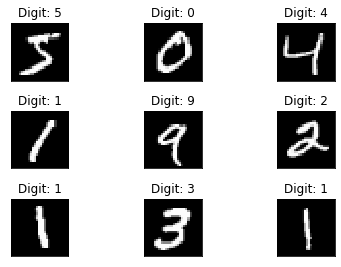

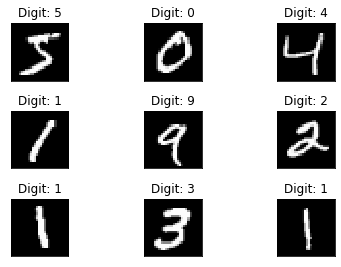

In [ ]:
#greyscalae visualization of the dataset
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [ ]:
#plt.imshow(X_train[0], cmap='gray')
#plt.title('Class '+ str(y_train[0]))

In [ ]:
#Prepare the data

In [ ]:
#Normalize the image pixel values from [0,255] to [-0.5,0.5] to make the network easier to train
#Reshape the each image from (28,28) to (28,28,1).
#255 maximum RGB value
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
#Convert the values into float as we can get decimal points after divide the value in 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
#Normalize the images by dividing the maximum RGB value
X_train/=255
X_train-=0.5
X_test/=255
X_test-=0.5


In [ ]:
# Reshape the images.
#X_train = np.expand_dims(X_train, axis=3)
#X_test = np.expand_dims(X_test, axis=3)


In [ ]:
print(X_train.shape) # (60000, 28, 28, 1)
print(X_test.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#Building the Neural Network model

In [ ]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
#Build the keras model using sequential class which represents the linear stac of layers
model = Sequential()
#Conv2D(number of filters, fiter_size, input _shape)
#the Conv2D parameters are self-explanatory variables
#For the later layers keras automatically infer the shapes
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
#MaxPooling2D(pool_size=pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten 2D arrays to 1D array
model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Dropout layers used for prevent the overfitting
model.add(Dropout(0.2))
#Dense layer have 10 neurons
model.add(Dense(10))
#the output softmax layer has 10 nodes 
model.add(Activation('softmax'))

In [ ]:
#Compile the Model

In [ ]:
#Configure the training process
#'adam' is used as the gardient based optimizer
#'categorical_crossentropy' used as the loss function .In the output layer  we used Softmax output layer.
#'metrics' used as a accuracy metric for the classification problem
model.compile('adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
#Training the data

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [ ]:
#Initialize the number of epochs to train that run the number of iterations over the entire dataset
#Validate the test data that is used for the training to periodically measure the network's performance against data
#Though the epoch number might seem a bit small. However, you will reach to 98–99% test accuracy. Since the MNIST dataset does not require heavy computing power, you may easily experiment with the epoch number as well.

In [ ]:
model_log = model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 195s 202ms/step - loss: 0.1254 - accuracy: 0.9601 - val_loss: 0.1006 - val_accuracy: 0.9674
Epoch 2/5
937/937 [==============================] - 208s 222ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 3/5
937/937 [==============================] - 220s 235ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 4/5
937/937 [==============================] - 216s 230ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0209 - val_accuracy: 0.9936
Epoch 5/5
937/937 [==============================] - 238s 254ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0261 - val_accuracy: 0.9911


In [ ]:
#Here we achieve 99.26% test accuracy 

In [ ]:
#Save the model in a disk to load it back anytime

In [ ]:
model.save_weights('cnn.h5')

In [ ]:
#Evaluate the model

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.026028146967291832
Test accuracy: 0.991100013256073


In [ ]:
#Show an individual predictions 

9


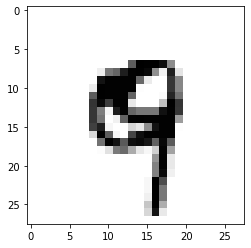

In [ ]:
#visual of the image
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

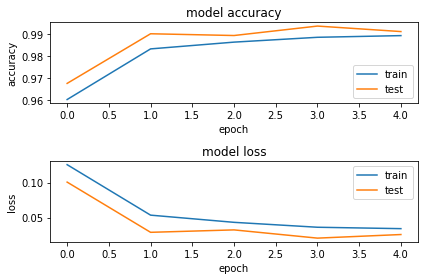

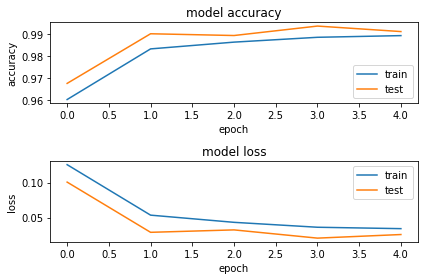

In [ ]:
#import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig